# Install Required Library

In [1]:
!pip install pytesseract
!pip install PyMuPDF
!apt-get install tesseract-ocr
!pip install num2words


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 30.1 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,005 kB/s)
Selecting 

# Import Required Library

In [3]:
import os
import pandas as pd
import pytesseract
from PIL import Image
import fitz  # PyMuPDF
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import time
import warnings
from tensorflow import keras
from tensorflow.keras import layers
from nltk.corpus import stopwords
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer, PorterStemmer
import unicodedata
from num2words import num2words
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, RMSprop, Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# Set Tesseract executable path
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# Extract text from PDF docs

In [4]:
# Directory containing the PDF files
pdf_directory = r"/content/formD"

# Initialize an empty list to store data
data = []

# Iterate through the PDF files in the directory
for filename in os.listdir(pdf_directory):
    if filename.endswith(".pdf"):
        pdf_path = os.path.join(pdf_directory, filename)

        try:
            text = ""
            # Use PyMuPDF (Fitz) to extract images from the PDF file
            pdf_document = fitz.open(pdf_path)
            for page_num in range(min(1, pdf_document.page_count)):
                page = pdf_document.load_page(page_num)
                images = page.get_pixmap()
                image = Image.frombytes("RGB", [images.width, images.height], images.samples)
                # Use Tesseract OCR to extract text from the image
                extracted_text = pytesseract.image_to_string(image)
                text += extracted_text
            pdf_document.close()

            # Append the extracted text to the list with the "document_name" and "label"
            data.append({"document_name": filename, "label": "formD", "text": text})
        except Exception as e:
            # Handle any exceptions that may occur during text extraction
            print(f"Error extracting text from {pdf_path}: {str(e)}")

# Create a DataFrame from the list of data
data_df = pd.DataFrame(data)

# Specify the path where you want to save the CSV file
csv_file_path = "/content/formD_data.csv"

# Save the DataFrame to a CSV file
data_df.to_csv(csv_file_path, index=False)

# Print the path where the CSV file is saved
print(f"DataFrame saved to {csv_file_path}")

# Display the resulting DataFrame
data_df


DataFrame saved to /content/formD_data.csv


,document_name,label,text
0,00112002.pdf,formD,“FORE D secures SSTRENTE comasion [SER aa\nWii...
1,00104245.pdf,formD,\n\n \n\n042901814 FAK enT ge u75 RIRRPATRICE...
2,01073664.pdf,formD,\n\n \n\n \n\n \n\nSECURITIES AND ERCRANGE co...
3,02010072.pdf,formD,— fi (<<\n\nUNITED STATES: Forms SAE]\n\n \n\n...
4,02010062.pdf,formD,\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n. FORM...
5,00068790.pdf,formD,\n\n \n\nrs\n\n \n\n \n\n \n\n \n\n \n\n‘UNI...
6,00104284.pdf,formD,\n \n \n\n \n\nvusrep sravis\nFORMD SE...
7,00092787.pdf,formD,\n\n= 1\n\nis APPROVAL\n\n \n \n\nUniTeD st...
8,02010054.pdf,formD,PROCESSED {1710073\n\n \n\n \n\n \n\n \n\n \n\...
9,01071680.pdf,formD,: [162.354\n\nFORM D\n\n \n\n \n \n \...


In [5]:

# Directory containing the PDF files
pdf_directory = r"/content/form13f"

# Initialize an empty list to store data
data = []

# Iterate through the PDF files in the directory
for filename in os.listdir(pdf_directory):
    if filename.endswith(".pdf"):
        pdf_path = os.path.join(pdf_directory, filename)

        try:
            text = ""
            # Use PyMuPDF (Fitz) to extract images from the PDF file
            pdf_document = fitz.open(pdf_path)
            for page_num in range(min(1, pdf_document.page_count)):
                page = pdf_document.load_page(page_num)
                images = page.get_pixmap()
                image = Image.frombytes("RGB", [images.width, images.height], images.samples)
                # Use Tesseract OCR to extract text from the image
                extracted_text = pytesseract.image_to_string(image)
                text += extracted_text
            pdf_document.close()

            # Append the extracted text to the list with the "document_name" and "label"
            data.append({"document_name": filename, "label": "form13f", "text": text})
        except Exception as e:
            # Handle any exceptions that may occur during text extraction
            print(f"Error extracting text from {pdf_path}: {str(e)}")

# Create a DataFrame from the list of data
data_df = pd.DataFrame(data)

# Specify the path where you want to save the CSV file
csv_file_path = "/content/form13f_data.csv"

# Save the DataFrame to a CSV file
data_df.to_csv(csv_file_path, index=False)

# Print the path where the CSV file is saved
print(f"DataFrame saved to {csv_file_path}")

# Display the resulting DataFrame
data_df


DataFrame saved to /content/form13f_data.csv


,document_name,label,text
0,00104270.pdf,form13f,TSFOUNP Jf\n\nForm 23F\n\nForm 13F COVER PAGE\...
1,00092793.pdf,form13f,MR BNA) CONFIDENTIAL TREATMENT\n\n. es oaG CON...
2,00092791.pdf,form13f,\n\niH VUNP H/t4/o0\n\n(CONPEDENTIAL TREATMEN...
3,00104245.pdf,form13f,\n\n \n\n042901814 FAK enT ge u75 RIRRPATRICE...
4,00104267.pdf,form13f,"\n\n \n\n13FCGME./""/ em\nGRRE sem INN\nmeanoy..."
5,00104258.pdf,form13f,\n\n. : MA\n\napse TSRCON P a/i4/oa\n\nAPPAR ...
6,00104247.pdf,form13f,\n\nFore 13F cove\n\n \n\n \n\n \n\n \n...
7,00104254.pdf,form13f,\n\nUNITED STATES\n- SECURITIES AND EXCHAN...
8,00104275.pdf,form13f,WsrCGNe\n\nnomen — 9/15/01\n\n \n\n \n
9,00104271.pdf,form13f,a\n1SFGON Pa/M4for Tagen\n\ncs CONFIDENTIAL\n\...


# Concatinate Dataset

In [18]:
# Specify the paths to the CSV files
form13f_csv_path = "/content/form13f_data.csv"
formD_csv_path = "/content/formD_data.csv"

# Read the two CSV files into DataFrames
form13f_df = pd.read_csv(form13f_csv_path)
formD_df = pd.read_csv(formD_csv_path)
# other_csv = pd.read_csv(other_csv_path)

# Concatenate the DataFrames row-wise
combined_df = pd.concat([form13f_df, formD_df], ignore_index=True)

# Display the combined DataFrame
combined_df


,document_name,label,text
0,00104270.pdf,form13f,TSFOUNP Jf\n\nForm 23F\n\nForm 13F COVER PAGE\...
1,00092793.pdf,form13f,MR BNA) CONFIDENTIAL TREATMENT\n\n. es oaG CON...
2,00092791.pdf,form13f,\n\niH VUNP H/t4/o0\n\n(CONPEDENTIAL TREATMEN...
3,00104245.pdf,form13f,\n\n \n\n042901814 FAK enT ge u75 RIRRPATRICE...
4,00104267.pdf,form13f,"\n\n \n\n13FCGME./""/ em\nGRRE sem INN\nmeanoy..."
...,...,...,...
87,00104283.pdf,formD,\n \n\nvarren stares\nFORM D SECURITIES A...
88,01071689.pdf,formD,LLG 62>\n\n \n\n \n\nNITED STA\nSECURITIES AND...
89,02010038.pdf,formD,\n \n \n \n\n \n\n \n\nFORM D\n’ securrmigs...
90,02010073.pdf,formD,"\n\nNE AAPRAPORT SEGAL a2ie9 7,002/006\n\n..."


# Preprocessing

In [19]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')


# Function for lemmatization
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in text.split()]
    return ' '.join(lemmatized_tokens)

# Function for stemming
def stem_text(text):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in text.split()]
    return ' '.join(stemmed_tokens)

# Function for vectorization
def vectorize_text(text):
    vectorizer = TfidfVectorizer()
    text_features = vectorizer.fit_transform(text)
    return text_features

# Function for preprocess the text
def preprocess_text(text, lower_case=True, convert_numbers=True, remove_punctuation=True,
                    remove_accents=True, remove_whitespace=True, expand_abbreviations=False,
                    remove_stopwords=True, sparse_terms=[], specific_words=[]):

    # Convert all letters to lower or upper case
    if lower_case:
        text = text.lower()
    else:
        text = text.upper()

    # Converting numbers into words or removing numbers
    if convert_numbers:
        # Replace numbers with their word equivalents using num2words library
        tokens = []
        for word in text.split():
            if word.isdigit():
                word = num2words(int(word))
            tokens.append(word)
        text = ' '.join(tokens)
    else:
        # Remove numbers using regular expression
        text = re.sub(r'\d+', '', text)

    # Removing punctuations, accent marks, and other diacritics
    if remove_punctuation:
        text = re.sub(r'[^\w\s]', '', text)
    if remove_accents:
        text = ''.join(c for c in unicodedata.normalize('NFD', text)
                       if not unicodedata.combining(c))

    # Removing white spaces
    if remove_whitespace:
        text = re.sub(r'\s+', ' ', text.strip())

    # Expanding abbreviations
    if expand_abbreviations:
        abbreviations = {'e.g.': 'for example', 'i.e.': 'that is', 'etc.': 'et cetera'}
        for abbr, expanded in abbreviations.items():
            text = text.replace(abbr, expanded)

    # Removing stop words, sparse terms, and specific words
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        text = ' '.join(word for word in text.split() if word not in stop_words)
    text = ' '.join(word for word in text.split() if word not in sparse_terms)
    text = ' '.join(word for word in text.split() if word not in specific_words)

    return text


# Apply the preprocessing function to a specific column
text_col = 'text'  # Specify the text column to preprocess
combined_df['new_text'] = combined_df[text_col].apply(preprocess_text)

# Apply lemmatization to a specific column
text_col = 'new_text'  # Specify the text column to preprocess
combined_df[text_col] = combined_df[text_col].apply(lemmatize_text)


# Check the preprocessed dataset and vectorized features
display(combined_df.head())

# display(text_features.toarray())
start_time = time.time()
# # Save the preprocessed dataset
combined_df.to_csv('docAI_Dataset.csv', index=False)

end_time = time.time() - start_time
print("Time taken for text preprocessing: ", end_time)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,document_name,label,text,new_text
0,00104270.pdf,form13f,TSFOUNP Jf\n\nForm 23F\n\nForm 13F COVER PAGE\...,tsfounp jf form 23f form 13f cover page report...
1,00092793.pdf,form13f,MR BNA) CONFIDENTIAL TREATMENT\n\n. es oaG CON...,mr bna confidential treatment e oag confidenti...
2,00092791.pdf,form13f,\n\niH VUNP H/t4/o0\n\n(CONPEDENTIAL TREATMEN...,ih vunp ht4o0 conpedential treatment requested...
3,00104245.pdf,form13f,\n\n \n\n042901814 FAK enT ge u75 RIRRPATRICE...,fortytwo million nine hundred one thousand eig...
4,00104267.pdf,form13f,"\n\n \n\n13FCGME./""/ em\nGRRE sem INN\nmeanoy...",13fcgme em grre sem inn meanoy8 ph two hundred...


Time taken for text preprocessing:  0.04343986511230469


In [20]:
# Preprocessing: Convert the labels to numeric values
label_encoder = LabelEncoder()
combined_df['label'] = label_encoder.fit_transform(combined_df['label'])

# Preprocessing: Split the dataset into input features and labels
X = combined_df['new_text']
y = combined_df['label']

In [21]:
## Split the data into training set and testing set
# Tokenization and vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=500)  # Consider top 5000 most frequent words
X = vectorizer.fit_transform(X).toarray()

# Padding sequences
max_sequence_length = X.shape[1]  # Choose the sequence length based on the vectorized features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (73, 500)
y_train shape: (73,)
X_test shape: (19, 500)
y_test shape: (19,)


# DNN model
### Model 1: Deep Neural Network
### Model 2: RMSProp with your choice of hyper parameters
### Model 3: Adam with your choice of hyper parameters


Training Deep Neural Network (DNN) model...
Fold 1
1/1 [==============================] - 0s 26ms/step - loss: 1.3153 - accuracy: 0.4000
Fold 2
1/1 [==============================] - 0s 30ms/step - loss: 1.3005 - accuracy: 0.7333
Fold 3
1/1 [==============================] - 0s 41ms/step - loss: 1.2893 - accuracy: 0.4667
Fold 4
1/1 [==============================] - 0s 42ms/step - loss: 1.2917 - accuracy: 0.3571
Fold 5
1/1 [==============================] - 0s 49ms/step - loss: 1.2557 - accuracy: 0.6429
Fold 1 Accuracy: 0.4000000059604645
Fold 2 Accuracy: 0.7333333492279053
Fold 3 Accuracy: 0.46666666865348816
Fold 4 Accuracy: 0.3571428656578064
Fold 5 Accuracy: 0.6428571343421936
Mean Accuracy: 0.5200000047683716
Total Time Taken: 8.042006969451904 seconds

Training Deep Neural Network (DNN) model with RMSProp with your choice of hyper parameters...
Fold 1
1/1 [==============================] - 0s 31ms/step - loss: 0.6744 - accuracy: 1.0000
Fold 2
1/1 [==============================]

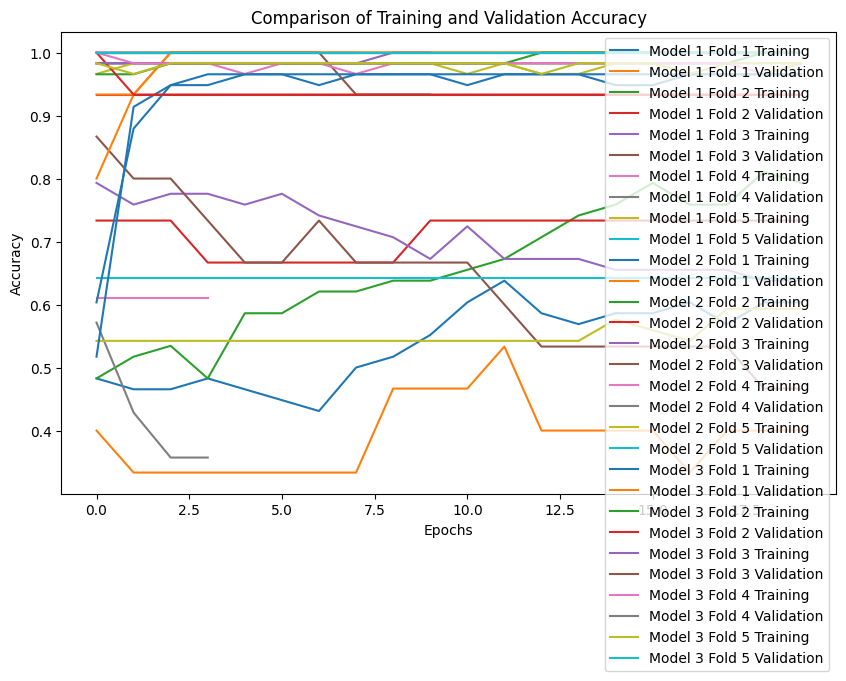

In [40]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Deep Neural Network
print("\nTraining Deep Neural Network (DNN) model...")
model1_accuracy_scores = []
model1_histories = []  # Store the history for each fold

# Define the DNN model architecture
model1 = Sequential()
model1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model1.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model
model1.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with cross-validation
start_time = time.time()
epochs = 20
kf = KFold(n_splits=5)
fold = 1
cv_scores = []

for train_index, val_index in kf.split(X_train):
    print(f"Fold {fold}")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.reset_index(drop=True)[train_index], y_train.reset_index(drop=True)[val_index]

    # Train the model for each fold
    fold_history = model1.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])
    model1_histories.append(fold_history.history)

    # Evaluate the model on the validation set
    _, accuracy = model1.evaluate(X_val_fold, y_val_fold)
    cv_scores.append(accuracy)

    fold += 1

end_time = time.time()
total_time = end_time - start_time

# Print the cross-validation scores and total time taken
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")

mean_accuracy_model1 = np.mean(cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Total Time Taken:", total_time, "seconds")

# Model 2: RMSProp with your choice of hyper parameters
print("\nTraining Deep Neural Network (DNN) model with RMSProp with your choice of hyper parameters...")
model2_histories = []  # Store the history for each fold

# Define the DNN model architecture
model2 = Sequential()
model2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model
model2.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001, rho=0.9), metrics=['accuracy'])

# Train the model with cross-validation
start_time = time.time()
fold = 1
cv_scores = []

for train_index, val_index in kf.split(X_train):
    print(f"Fold {fold}")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.reset_index(drop=True)[train_index], y_train.reset_index(drop=True)[val_index]

    # Train the model for each fold
    fold_history = model2.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])
    model2_histories.append(fold_history.history)

    # Evaluate the model on the validation set
    _, accuracy = model2.evaluate(X_val_fold, y_val_fold)
    cv_scores.append(accuracy)

    fold += 1

end_time = time.time()
total_time = end_time - start_time

# Print the cross-validation scores and total time taken
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")

mean_accuracy_model2 = np.mean(cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Total Time Taken:", total_time, "seconds")

# Model 3: Adam with your choice of hyper parameters
print("\nTraining Deep Neural Network (DNN) model with Adam with your choice of hyper parameters...")
model3_accuracy_scores = []
model3_histories = []  # Store the history for each fold

# Define the DNN model architecture
model3 = Sequential()
model3.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model3.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model3.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model3.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile the model
model3.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model with cross-validation
start_time = time.time()
fold = 1
cv_scores = []

for train_index, val_index in kf.split(X_train):
    print(f"Fold {fold}")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.reset_index(drop=True)[train_index], y_train.reset_index(drop=True)[val_index]

    # Train the model for each fold
    fold_history = model3.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])
    model3_histories.append(fold_history.history)

    # Evaluate the model on the validation set
    _, accuracy = model3.evaluate(X_val_fold, y_val_fold)
    cv_scores.append(accuracy)

    fold += 1

end_time = time.time()
total_time = end_time - start_time

# Print the cross-validation scores and total time taken
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} Accuracy: {score}")
mean_accuracy_model3 = np.mean(cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Total Time Taken:", total_time, "seconds")


##########

# Find the model with the highest mean accuracy
best_model_index = np.argmax([mean_accuracy_model1, mean_accuracy_model2, mean_accuracy_model3])
best_model = None

if best_model_index == 0:
    best_model = model1
    best_mean_accuracy = mean_accuracy_model1
    best_model_name = "Model 1 (SGD)"
elif best_model_index == 1:
    best_model = model2
    best_mean_accuracy = mean_accuracy_model2
    best_model_name = "Model 2 (RMSProp)"
else:
    best_model = model3
    best_mean_accuracy = mean_accuracy_model3
    best_model_name = "Model 3 (Adam)"

# Save the best model
best_model.save("/content/model/best_model.h5")
print(f"The best model is {best_model_name} with a mean accuracy of {best_mean_accuracy:.4f}. Model saved at /content/model/best_model.h5. \n\n\n")

##########

# Plot the comparison of training and validation accuracy for all models
plt.figure(figsize=(10, 6))

# Plot Model 1
for i, history in enumerate(model1_histories):
    plt.plot(history['accuracy'], label=f"Model 1 Fold {i+1} Training")
    plt.plot(history['val_accuracy'], label=f"Model 1 Fold {i+1} Validation")

# Plot Model 2
for i, history in enumerate(model2_histories):
    plt.plot(history['accuracy'], label=f"Model 2 Fold {i+1} Training")
    plt.plot(history['val_accuracy'], label=f"Model 2 Fold {i+1} Validation")

# Plot Model 3
for i, history in enumerate(model3_histories):
    plt.plot(history['accuracy'], label=f"Model 3 Fold {i+1} Training")
    plt.plot(history['val_accuracy'], label=f"Model 3 Fold {i+1} Validation")

plt.title("Comparison of Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

1/1 [==============================] - 0s 248ms/step


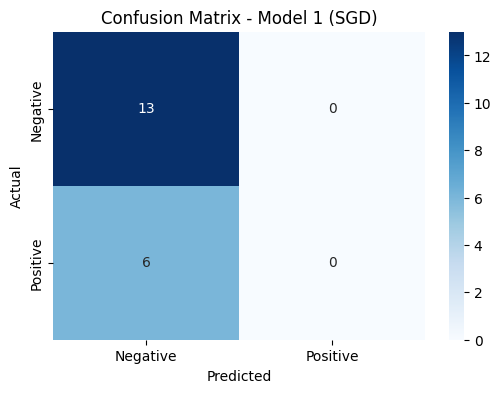

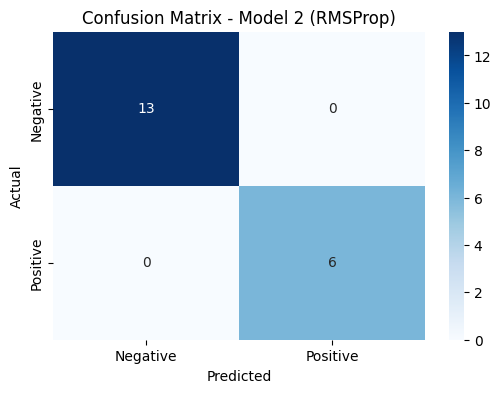

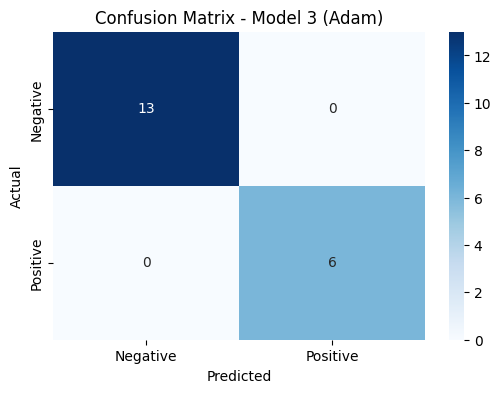

In [41]:
# Define a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Evaluate and plot the confusion matrix for each model
y_pred_model1 = model1.predict(X_test) > 0.5
y_pred_model2 = model2.predict(X_test) > 0.5
y_pred_model3 = model3.predict(X_test) > 0.5

plot_confusion_matrix(y_test, y_pred_model1, "Model 1 (SGD)")
plot_confusion_matrix(y_test, y_pred_model2, "Model 2 (RMSProp)")
plot_confusion_matrix(y_test, y_pred_model3, "Model 3 (Adam)")





# LSTM Model

In [48]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

max_words = 1000  # Number of most frequent words to keep
max_sequence_length = 100  # Max sequence length for padding

# Preprocess the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(combined_df['new_text'])
sequences = tokenizer.texts_to_sequences(combined_df['new_text'])
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(combined_df['label'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the LSTM model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_words, 128, input_length=max_sequence_length))
model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

# Predict on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Convert label_encoder.classes_ to a list of strings
class_names = label_encoder.classes_.astype(str)

# Print confusion matrix and classification report
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred, target_names=class_names)

print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_report_str)


Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.6950 - accuracy: 0.3621 - val_loss: 0.6861 - val_accuracy: 0.7333
Epoch 2/10
1/1 [==============================] - 0s 334ms/step - loss: 0.6881 - accuracy: 0.5862 - val_loss: 0.6771 - val_accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 0s 279ms/step - loss: 0.6809 - accuracy: 0.5690 - val_loss: 0.6670 - val_accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 318ms/step - loss: 0.6726 - accuracy: 0.5690 - val_loss: 0.6545 - val_accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 0s 312ms/step - loss: 0.6621 - accuracy: 0.5690 - val_loss: 0.6385 - val_accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 0s 309ms/step - loss: 0.6480 - accuracy: 0.6207 - val_loss: 0.6173 - val_accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 0s 297ms/step - loss: 0.6283 - accuracy: 0.8276 - val_loss: 0.5869 - val_accuracy: 0.9333
Epoch 8/10
1/1 [=======

# Conclusion

The LSTM model performs well, with precision, recall, and F1-score equal to 1 when compared to the Deep Neural Network with RMSProp using your chosen hyperparameters and Adam with your chosen hyperparameters

# Outcomes

1. A model that can categorize a form with as high an accuracy as possible
Answer: Discussed in the Conclusion section.

2. A documentation of your approach along with reasoning for your model choices
Answer: Discussed in the Conclusion section.

3. Model evaluation techniques used for classification.
Answer: Classification Report

4. Balance between accuracy and speed for simple vs complex models
Answer: Print the total time taken and accuracy of models for simple vs complex models.

5. Accuracy and Speed metrics.
Answer: Print the total time taken and accuracy of models.